In [1]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

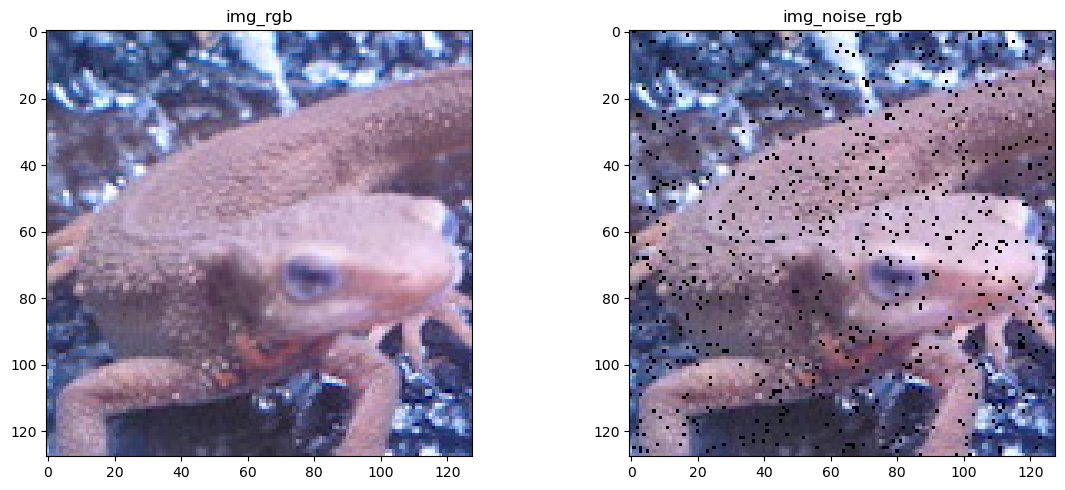

In [11]:
# 基础图像读取、matplotlib图像显示

img = cv2.imread("imori.jpg")
# 转换为 RGB（供 Matplotlib 显示）
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_noise = cv2.imread("imori_noise.jpg")
# 转换为 RGB（供 Matplotlib 显示）
img_noise_rgb = cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB)


# 创建 1 行 2 列的子图网格
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 显示每个图像
axes[0].imshow(img_rgb)
axes[0].set_title('img_rgb')
#axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_noise_rgb)
axes[1].set_title('img_noise_rgb')
#axes[1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

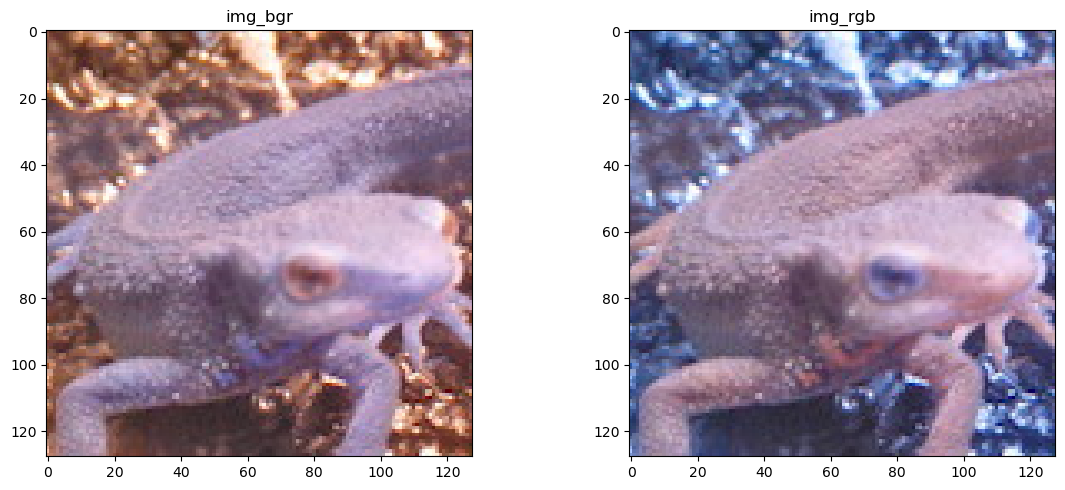

In [12]:
img_bgr = cv2.imread("imori.jpg")
# 转换为 RGB
img_rgb = img[:,:,[2,1,0]]

# 创建 1 行 2 列的子图网格
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 显示每个图像
axes[0].imshow(img_bgr)
axes[0].set_title('img_bgr')
#axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_rgb)
axes[1].set_title('img_rgb')
#axes[1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

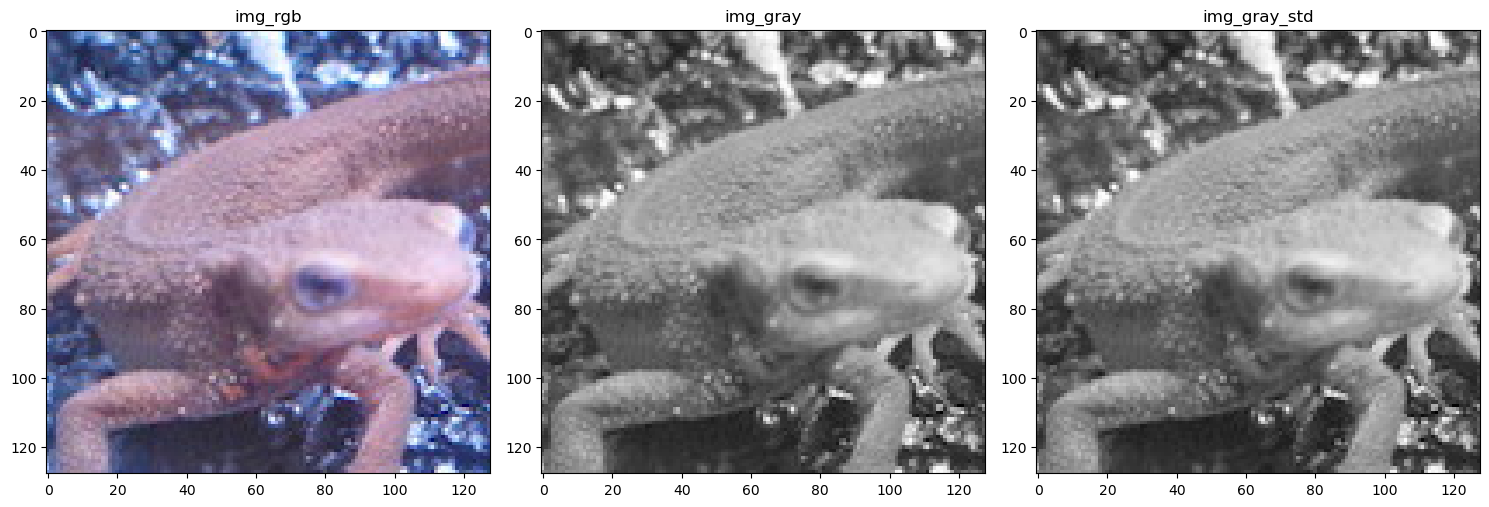

In [29]:
#灰度化
def gray(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    gray = R * 0.2126 + G * 0.7152 + B * 0.0722
    return np.clip(gray, 0, 255).astype(np.uint8)

img_bgr = cv2.imread("imori.jpg")
# 转换为 RGB
img_rgb = img_bgr[:,:,[2,1,0]]
img_gray = gray(img_rgb)
img_gray_std = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 创建 1 行 2 列的子图网格
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img_rgb)
axes[0].set_title('img_rgb')
#axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_gray, cmap='gray')
axes[1].set_title('img_gray')
#axes[1].axis('off')

axes[2].imshow(img_gray_std, cmap='gray')
axes[2].set_title('img_gray_std')
#axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

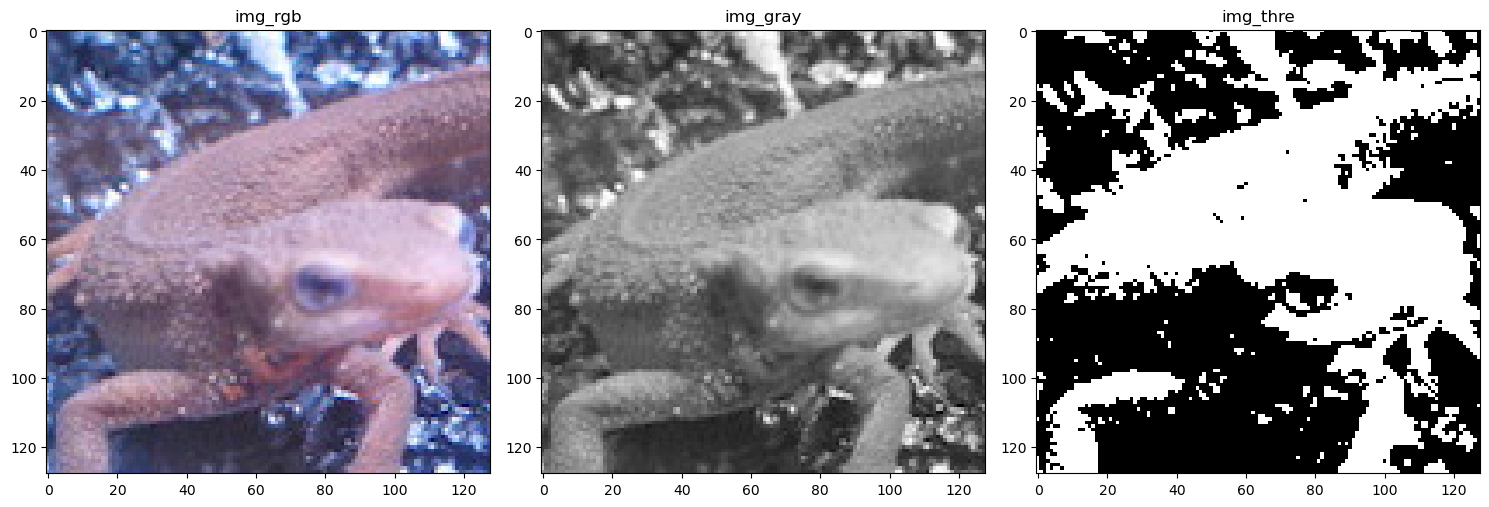

In [33]:
#二值化
def thre(img, t = 128):
    img_thre = img.copy()
    # NumPy布尔索引操作，实现对矩阵根据条件批量修改
    img_thre[img_thre < t] = 0
    img_thre[img_thre >= t] = 255
    return img_thre

img_bgr = cv2.imread("imori.jpg")
# 转换为 RGB
img_rgb = img_bgr[:,:,[2,1,0]]
img_gray = gray(img_rgb)
img_thre = thre(img_gray)

# 创建 1 行 2 列的子图网格
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img_rgb)
axes[0].set_title('img_rgb')
#axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_gray, cmap='gray')
axes[1].set_title('img_gray')
#axes[1].axis('off')

axes[2].imshow(img_thre, cmap='gray')
axes[2].set_title('img_thre')
#axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

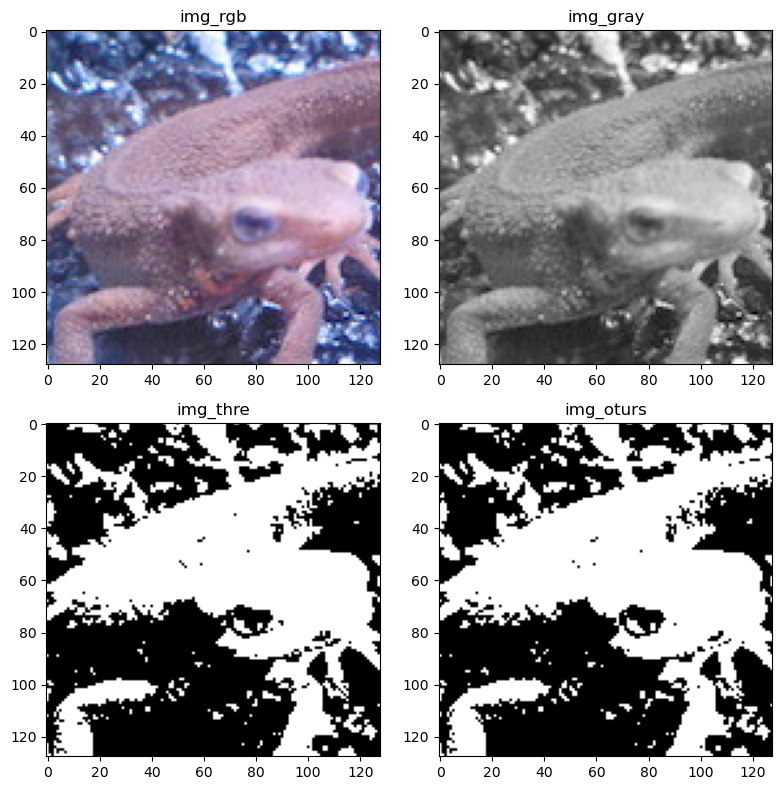

In [45]:
# 使用大津算法来二值化图像
# 大津算法，也被称作最大类间方差法，是一种可以自动确定二值化中阈值的算法。从类内方差和类间方差的比值计算得来。

#计算类间方差
def sfunc(img,t):
    w = img > t
    w1 = w.sum()/w.size
    w0 = 1-w1
    if w1==0 or w0==0:
        return 0
    m1 = np.mean(img[w])
    m0 = np.mean(img[~w])
    return w0*w1*(m0-m1)*(m0-m1)

#计算最大类间方差
def oturs(img):
    t = 0
    sd = 0
    for i in range(255):
        newsd = sfunc(img,i)
        if newsd > sd:
            sd = newsd
            t = i
    return t

img_bgr = cv2.imread("imori.jpg")
# 转换为 RGB
img_rgb = img_bgr[:,:,[2,1,0]]
img_gray = gray(img_rgb)
img_thre = thre(img_gray)
thread_oturs = oturs(img_gray)
img_oturs = thre(img_gray, thread_oturs)


plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb) # 显示图像
plt.title("img_rgb") # 设置子图标题
#plt.axis('off') # 关闭坐标轴

plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap='gray') # 显示图像
plt.title("img_gray") # 设置子图标题

plt.subplot(2, 2, 3)
plt.imshow(img_thre, cmap='gray')
plt.title("img_thre")

plt.subplot(2, 2, 4)
plt.imshow(img_oturs, cmap='gray')
plt.title("img_oturs")

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3124\46459570.py:21: RuntimeWarning: invalid value encountered in divide
  hsv[h_b,0] = 60*(G[h_b]-R[h_b])/(max[h_b]-min[h_b])+60
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3124\46459570.py:22: RuntimeWarning: invalid value encountered in divide
  hsv[h_r,0] = 60*(B[h_r]-G[h_r])/(max[h_r]-min[h_r])+180
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3124\46459570.py:23: RuntimeWarning: invalid value encountered in divide
  hsv[h_g,0] = 60*(R[h_g]-B[h_g])/(max[h_g]-min[h_g])+300


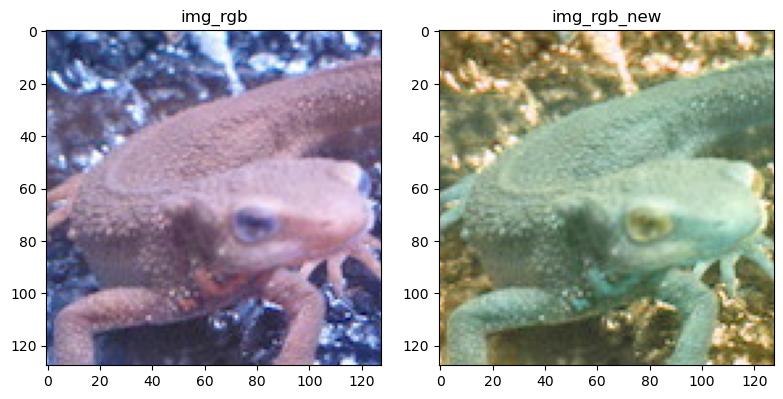

In [49]:
# rgb -- hsv转化

# HSV即使用色相（Hue）、饱和度（Saturation）、明度（Value）来表示色彩的一种方式。
def rgb2hsv(img):
    img = img.copy()
    #标准化
    img = img / 255
    #将img拉成 [128*128,3] 方便计算
    old_shape = img.shape
    img = img.reshape(-1,3)
    
    R,G,B = img[:,0],img[:,1],img[:,2]
    max = np.max(img, axis=1)
    min = np.min(img, axis=1)
    hsv = np.zeros_like(img)
    
    #计算色相
    h_b = min == B
    h_r = min == R
    h_g = min == G
    hsv[h_b,0] = 60*(G[h_b]-R[h_b])/(max[h_b]-min[h_b])+60
    hsv[h_r,0] = 60*(B[h_r]-G[h_r])/(max[h_r]-min[h_r])+180
    hsv[h_g,0] = 60*(R[h_g]-B[h_g])/(max[h_g]-min[h_g])+300
    #饱和度
    hsv[:,1] = max-min
    #明度
    hsv[:,2] = max
    
    return hsv.reshape(old_shape)

def hsv2rgb(img):
    img = img.copy()
    #色相是环形的，所以要模360°
    img[:,:,0] = np.mod(img[:,:,0],360)
    
    old_shape = img.shape
    img = img.reshape(-1,3)
    c = img[:,1]
    h = img[:,0]/60
    x = c*(1-np.abs(np.mod(h,2)-1))
    v = img[:,2]

    #计算rgb
    #先建立v-c的基础数组，v-c*(1,1,1)
    v_c = (v-c).reshape(-1,1)
    rgb = np.repeat(v_c,3,axis=1)
    
    #划分条件,组合起来加到初始数组上
    h0 = (h>=0)*(h<1)
    zero = np.zeros(h0.sum())
    rgb[h0] += np.vstack((c[h0],x[h0],zero)).T
    h1 = (h>=1)*(h<2)
    zero = np.zeros(h1.sum())
    rgb[h1] += np.vstack((x[h1],c[h1],zero)).T
    h2 = (h>=2)*(h<3)
    zero = np.zeros(h2.sum())
    rgb[h2] += np.vstack((zero,c[h2],x[h2])).T
    h3 = (h>=3)*(h<4)
    zero = np.zeros(h3.sum())
    rgb[h3] += np.vstack((zero,x[h3],c[h3])).T
    h4 = (h>=4)*(h<5)
    zero = np.zeros(h4.sum())
    rgb[h4] += np.vstack((x[h4],zero,c[h4])).T
    h5 = (h>=5)*(h<6)
    zero = np.zeros(h5.sum())
    rgb[h5] += np.vstack((c[h5],zero,x[h5])).T
    return rgb.reshape(old_shape)

img_bgr = cv2.imread("imori.jpg")
img_rgb = img_bgr[:,:,[2,1,0]]

img_hsv = rgb2hsv(img_rgb)
img_hsv[:,:,0] += 180
img_rgb_new = hsv2rgb(img_hsv)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb) # 显示图像
plt.title("img_rgb") # 设置子图标题
#plt.axis('off') # 关闭坐标轴

plt.subplot(2, 2, 2)
plt.imshow(img_rgb_new) # 显示图像
plt.title("img_rgb_new") # 设置子图标题

plt.tight_layout()
plt.show()

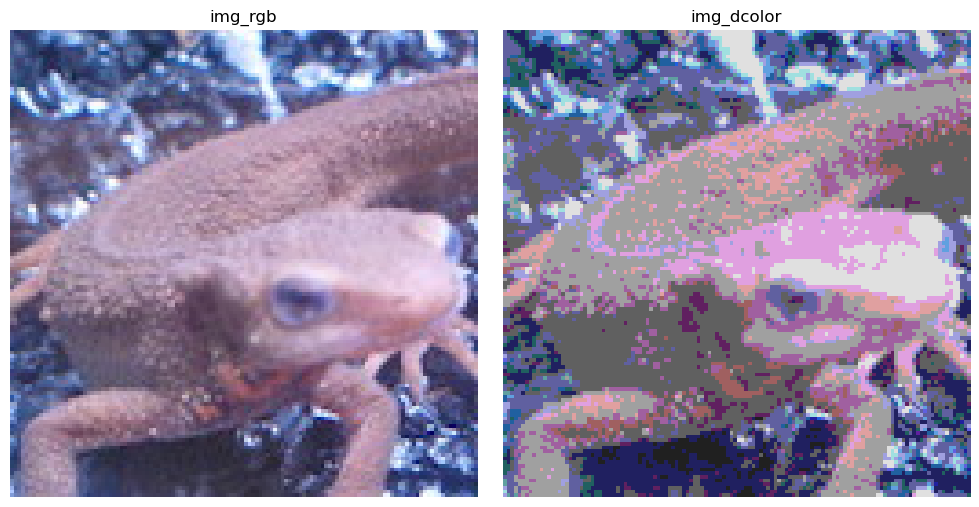

In [54]:
# 色彩量化，减色处理

def dcolor(img):
    img = img.copy()
    img[img<64] = 32
    img[(img>=64)*(img<128)] = 96
    img[(img>=128)*(img<192)] = 160
    img[(img>=192)*(img<256)] = 224
    return img

img_bgr = cv2.imread("imori.jpg")
img_rgb = img_bgr[:,:,[2,1,0]]
img_dcolor = dcolor(img_rgb)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb) # 显示图像
plt.title("img_rgb") # 设置子图标题
plt.axis('off') # 关闭坐标轴

plt.subplot(2, 2, 2)
plt.imshow(img_dcolor) # 显示图像
plt.title("img_dcolor") # 设置子图标题
plt.axis('off')

plt.tight_layout()
plt.show()

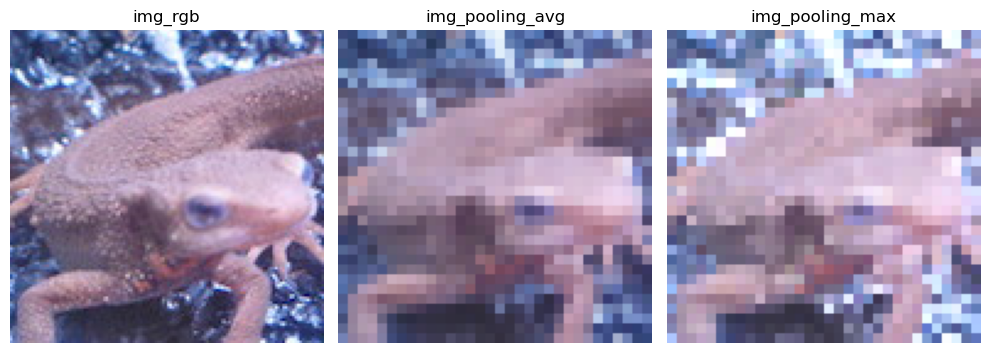

In [60]:
# 池化（Average Pooling）
# 将图片按照固定大小网格分割，网格内的像素值取网格内所有像素的平均值。将这种把图片使用均等大小网格分割，并求网格内代表值的操作称为池化（Pooling）
# 池化操作是**卷积神经网络（Convolutional Neural Network）**中重要的图像处理方式

def pooling(img,length,method):
    img = img.copy()
    for i in range(int(img.shape[0]/length)):
        for j in range(int(img.shape[1]/length)):
            area = img[i*length:(i+1)*length,j*length:(j+1)*length]
            if(method=="avg"):
                area[:,:,0] = area[:,:,0].mean()
                area[:,:,1] = area[:,:,1].mean()
                area[:,:,2] = area[:,:,2].mean()
            if(method=="max"):
                area[:,:,0] = area[:,:,0].max()
                area[:,:,1] = area[:,:,1].max()
                area[:,:,2] = area[:,:,2].max()
    return img

img_bgr = cv2.imread("imori.jpg")
img_rgb = img_bgr[:,:,[2,1,0]]
img_pooling_avg = pooling(img_rgb, 4, "avg")
img_pooling_max = pooling(img_rgb, 4, "max")

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb) # 显示图像
plt.title("img_rgb") # 设置子图标题
plt.axis('off') # 关闭坐标轴

plt.subplot(1, 3, 2)
plt.imshow(img_pooling_avg) # 显示图像
plt.title("img_pooling_avg") # 设置子图标题
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_pooling_max) # 显示图像
plt.title("img_pooling_max") # 设置子图标题
plt.axis('off')

plt.tight_layout()
plt.show()

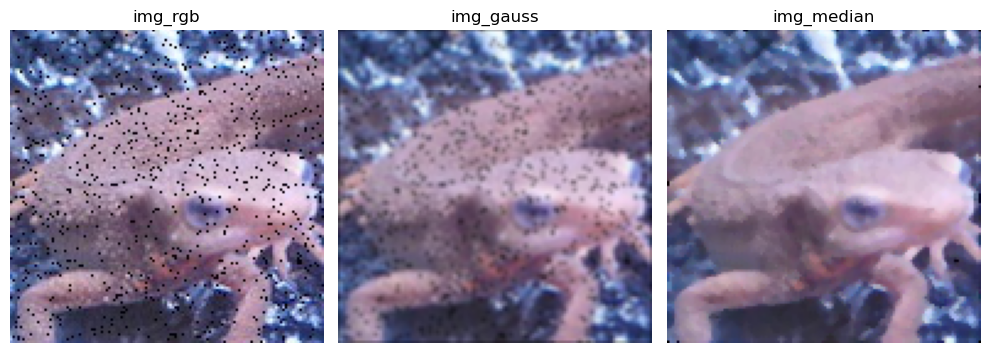

In [62]:
# 高斯滤波器是一种可以使图像平滑的滤波器，用于去除噪声
# 高斯滤波器将中心像素周围的像素按照高斯分布加权平均进行平滑化。这样的（二维）权值通常被称为卷积核（kernel）或者滤波器（filter）。

def padding(img,s=1):
    img = img.copy()
    #先加行
    rows = np.zeros((s,img.shape[1],img.shape[2]),dtype="uint8")
    #再加列，这时候列长已经扩充 2*s
    columns = np.zeros((img.shape[0]+(2*s),s,img.shape[2]),dtype="uint8")
    #拼接
    img = np.vstack((rows,img,rows))
    img = np.hstack((columns,img,columns))
    return img

def medianFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #进行排序后取出中间值
    newk = np.sort(area,axis=1)[:,4]
    return newk

def gaussFilter(area,kernel):
    #拉成一条，用矩阵的乘法完成滤波计算，参考卷积核计算方法
    area = area.reshape(-1,3)
    newk = np.dot(kernel,area)
    newk = newk.astype(np.uint8)
    return newk

def getarea(img,padding,method):
    #建立一个新的数组，该数组用于保存计算的高斯滤波值，所以要去掉padding
    result = np.zeros([img.shape[0]-2*padding,
                      img.shape[1]-2*padding,
                      img.shape[2]],dtype="uint8")
    
    for i in range(int(img.shape[0]-2)):
        for j in range(int(img.shape[1]-2)):
            area = img[i:i+3,j:j+3]
            if(method=="gaussian"):
                #将像素值赋值到中心点
                kernel = np.array([1,2,1,2,4,2,1,2,1])*(1/16)
                result[i,j,:] = gaussFilter(area,kernel)
            if(method=="median"):
                result[i,j,:] = medianFilter(area)

    return result

img_bgr = cv2.imread("imori_noise.jpg")
img_rgb = img_bgr[:,:,[2,1,0]]
img_pad = padding(img_rgb, 1)
img_gauss = getarea(img_pad, 1,"gaussian")
img_median = getarea(img_pad, 1,"median")

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb) # 显示图像
plt.title("img_rgb") # 设置子图标题
plt.axis('off') # 关闭坐标轴

plt.subplot(1, 3, 2)
plt.imshow(img_gauss) # 显示图像
plt.title("img_gauss") # 设置子图标题
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_median) # 显示图像
plt.title("img_median") # 设置子图标题
plt.axis('off')

plt.tight_layout()
plt.show()
